# Muon Tomography exercise

## 1.-Introduction

The following exercise implements an example of Scattering Muon Tomography. Three datasets containing the positions and directions of cosmic muons before and after a target are provided. For more information on the setup go the corresponding lecture on indico.

The exercise features one of the most well-known muography algorithms: the Point-Of-Closest-Approach (POCA) approach. The algorithm is quite simple, nevertheless it is already implemented. Across the exercise, you will have to tune some of the parameters, add some plots and answer several questions.  

## 2.- Getting the data

Three datasets are available at my cernbox repository. The size is about 50 MB per dataset. Just execute the code bellow to download them.

In [ ]:
import urllib.request
# urllib.request.urlretrieve('https://cernbox.cern.ch/remote.php/dav/public-files/UMKEEe1o9RTinAM/DataMuongraphy/dataset1.h5', 'dataset1.h5')
# urllib.request.urlretrieve('https://cernbox.cern.ch/remote.php/dav/public-files/joA77dgwabTehqf/DataMuongraphy/dataset2.h5', 'dataset2.h5')
# urllib.request.urlretrieve('https://cernbox.cern.ch/remote.php/dav/public-files/f52Jg66HwG1auVD/DataMuongraphy/dataset3.h5', 'dataset3.h5')
               

('dataset3.h5', <http.client.HTTPMessage at 0x20fd7f120c0>)

## 3.- Reading the datasets

In this application we will use pandas to read the dataset. They are stored in hdf5 format which is one of the most commonly used formats in machine learning applications today.

Load one dataset at a time. Start the exercise with './dataset1.h5'. For some of the questions you will have to run on the other datasets and explain your observations. 

In [3]:
import pandas as pd
dataset= pd.read_hdf('./dataset1.h5')

## 5.- Calculation of the POCA

Nothing has to be done in this function, but please take your time to see the implementation and understand the geometrical concept behind.

In [7]:
import numpy as np

def getPoint(r1, r2, v1, v2):

    #Calculation of the closest point of approach
    cross_st = np.cross(v1, v2)
    cross_stnorm = np.linalg.norm(cross_st)
    vts = np.dot(v1, v2)
    if cross_stnorm < 1.0e-6 or vts < 1.0e-6:
        return False, [0, 0, 0]
    # if cross_stnorm < 1.0e-6:
    #     return "vectores paralelos"
    # if vts < 1.0e-6:
    #     return "vectores perpendiculares"
    cross_sst = np.cross(v1, cross_st)
    DeltaR = r1 - r2
    xpoca2 = r2 - v2 * np.dot(DeltaR, cross_sst)/cross_stnorm**2
    xpoca1 = r1 + v1 * np.dot((xpoca2-r1), v1)/vts
    v = 0.5 * (xpoca1 + xpoca2)
    return True, v

r1 = np.array([1, 3, 0])
r2 = np.array([1, 0, 0])
v1 = np.array([0, 0, 10])
v2 = np.array([1, 2, 1])

print(getPoint(r1, r2, v1, v2))

(True, array([1.6, 2.7, 6.6]))


## 4.- Selection cuts and parameters

The following dictionary contains parameters related to the application of the POCA algorithm. In particular:

* 'theshold1' and 'threshold2' select events according to the angular deviation the muon suffered in the x and y directions respectively. These numbers are given in radians.
* 'VWnbinP' is the number of bins in the VW projection (VW=XY, XZ, YZ) and in the P coordinate (P= X, Y, Z).
* 'limitV' contains the limits of the region that will be explored in the V coordinate (V = X, Y, Z). POCA points outside this region will not be considered. These numbers are given in centimeters.

Later you will have to tune these numbers to obtain a good image of the target.

In [5]:
#Data structure for selection and plotting

binInfo = dict()
binInfo['thresholdx'] = 0.05
binInfo['thresholdy'] = 0.05
binInfo['xynbinx'] = 160
binInfo['xynbiny'] = 160
binInfo['xznbinx'] = 160
binInfo['xznbinz'] = 160
binInfo['yznbiny'] = 160
binInfo['yznbinz'] = 160
binInfo['limitX'] = [-30, 30]
binInfo['limitY'] = [-30, 30]
binInfo['limitZ'] = [-5, 5]

# # This ones are for the 3d plot
# binInfo = dict()
# binInfo['thresholdx'] = 0.05
# binInfo['thresholdy'] = 0.05
# binInfo['xynbinx'] = 160
# binInfo['xynbiny'] = 160
# binInfo['xznbinx'] = 160
# binInfo['xznbinz'] = 160
# binInfo['yznbiny'] = 160
# binInfo['yznbinz'] = 160
# binInfo['limitX'] = [-8, 8]
# binInfo['limitY'] = [-3, 3]
# binInfo['limitZ'] = [-2, 2]

## 6.- Looping through the dataset

This part of the code loops through the dataset and stores the POCA points in arrays. Please take your time to understand the selection criteria applied. 


In [9]:
ax = []
ay = []
az = []

x = []
y = []
z = []

# loop through the rows using iterrows()
for index, row in dataset.iterrows():
    #if index > 100:
    #    break
    r1 = np.asarray([row['x1'], row['y1'], row['z1']])
    r2 = np.asarray([row['x2'], row['y2'], row['z2']])
    v1 = np.asarray([row['vx1'], row['vy1'], row['vz1']])
    v2 = np.asarray([row['vx2'], row['vy2'], row['vz2']])
    dtx = row['dthetax']
    dty = row['dthetay']

    valid = False
    ###Apply here a simple angular selection
    if abs(dtx) > binInfo['thresholdx'] or abs(dty) > binInfo['thresholdy']:
        
        valid, v = getPoint(r1, r2, v1, v2)
        print(valid, index, v)
        if not valid:
            continue
        if v[0] < binInfo['limitX'][0] or v[0] > binInfo['limitX'][1]:
            continue
        if v[1] < binInfo['limitY'][0] or v[1] > binInfo['limitY'][1]:
            continue
        if v[2] < binInfo['limitZ'][0] or v[2] > binInfo['limitZ'][1]:
            continue
        ax.append(v[0])
        ay.append(v[1])
        az.append(v[2])
    else:
        continue
    x = np.asarray(ax)
    y = np.asarray(ay)
    z = np.asarray(az)
print(len(x))

True 3 [ -4.68968347   4.47159327 -13.69427304]
True 10 [-2.89049633  1.85367038 -3.89487469]
True 46 [-1.03288808 -1.70019581 -7.9004695 ]
True 72 [ -2.69283828   5.98455444 -16.01937585]
True 80 [-2.42110479  2.58008124 -4.89984451]
True 93 [ 2.46000953 -7.68875538  1.11540436]
True 94 [  2.05295313   1.78566338 -24.71953879]
True 115 [-11.48169693  -1.14637948 -36.01531085]
True 122 [-8.83475526 -2.31360286 -0.27896331]
True 125 [ 3.76965614  1.56894485 -2.62367864]
True 149 [1.6855929  2.5212403  1.06194876]
True 156 [-1.24360794  2.08325061 -0.28738364]
True 224 [ -0.71495369  -6.84839362 -13.98826542]
True 258 [  7.63311907  -7.93912562 -23.8692487 ]
True 266 [ 5.60444408  2.00519169 -4.02507628]
True 300 [-2.91179674 -0.15267195  4.43337128]
True 303 [-1.96436925 -3.22547522 -1.62389249]
True 310 [-12.86375648   1.56384904 -16.39787359]
True 339 [  -3.72741551  -85.1783124  -171.50019509]
True 348 [  6.12732027   7.50794225 -17.69802442]
True 362 [-4.66719372  0.61715313 -5.2517

## 7.- Create all the plots 

This piece of code creates all the plots. Later on you will have to modify and add more plots. 

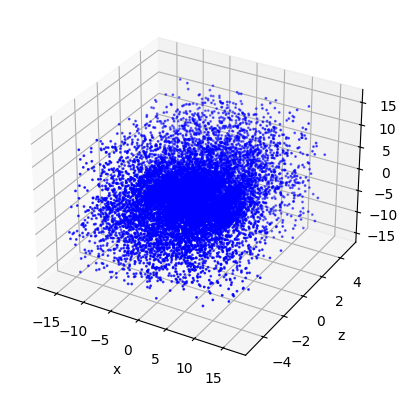

In [72]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# ax = fig.add_subplot()

ax.scatter(x, z, y, c="blue", s=1)
ax.set_xlabel("x")
ax.set_ylabel("z")
# ax.view_init(elev=0, azim=-89)
plt.show()

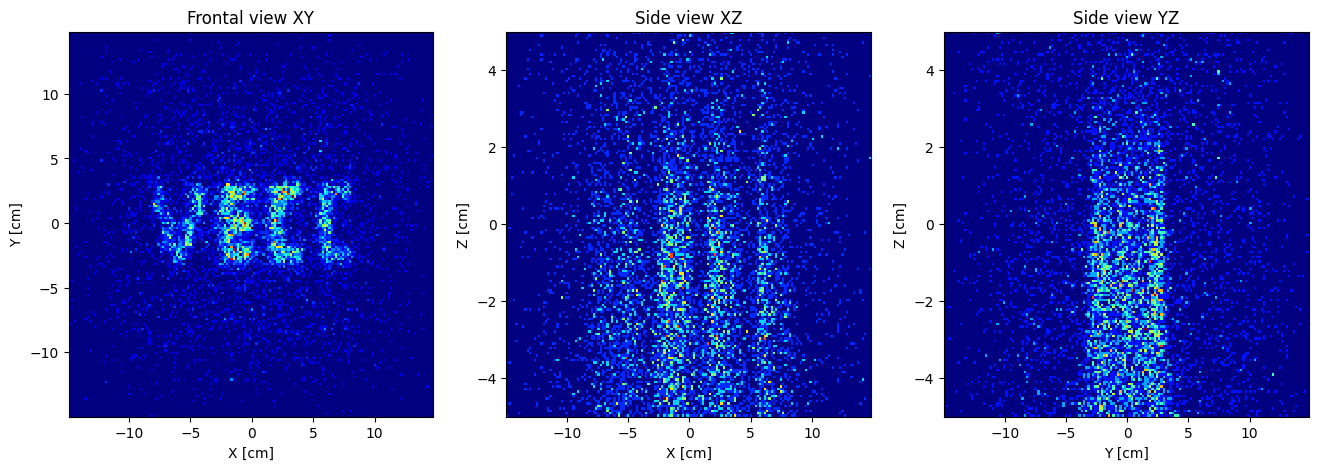

In [76]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax[0].set_title('Frontal view XY')
ax[1].set_title('Side view XZ')
ax[2].set_title('Side view YZ')
ax[0].set_xlabel('X [cm]')
ax[0].set_ylabel('Y [cm]')
ax[1].set_xlabel('X [cm]')
ax[1].set_ylabel('Z [cm]')
ax[2].set_xlabel('Y [cm]')
ax[2].set_ylabel('Z [cm]')

ax[0].hist2d(x, y, bins=(binInfo['xynbinx'], binInfo['xynbiny']), cmap=plt.cm.jet)
ax[1].hist2d(x, z, bins=(binInfo['xznbinx'], binInfo['xznbinz']), cmap=plt.cm.jet)
ax[2].hist2d(y, z, bins=(binInfo['yznbiny'], binInfo['yznbinz']), cmap=plt.cm.jet)
plt.show()


## 8.- Exercises and questions

##### Q1. Start with the first dataset. Tune the parameters until you see something meaninful in the plots. Take into account that looping through the dataset takes some time, so try to limit the number of steps but thinking about the geometry described in the slides. For the first dataset, do not use angular cuts below 0.03 or it will take very long to run.

##### Q2. Take a look at the three projections XY, XZ, and YZ. Is the resolution the same in all of them? Which one is better? Try to explain why.

##### Q3. Implement two additional plots showing the 1D distribution of the x and y angular distributions.

##### Q4. Use now the second dataset with the parameters you found before. What do you see? Do you have an hypothesis about what's going on with this dataset?

##### Q5. Can you improve the previous images by tuning the angular cuts?

##### Q6. Have a look at the 1D angular distributions. What do you see?

##### Q7. Use now the third dataset with the parameters you found for the first dataset. What do you see? Do you have an hypothesis about what's going on with this dataset?

##### Q8. Can you improve the previous image by tuning the angular cuts?

##### Q9. Have a look at the 1D angular distributions. What do you see?